In [1]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder#Now let's import encoder from sklearn library

In [2]:
#load the dataset
#load the dataset
trainset = pd.read_csv(r'C:\Users\Shweta\Desktop\Data Science\Python Data Science\dataset\bigMart\train.csv')
testset = pd.read_csv(r'C:\Users\Shweta\Desktop\Data Science\Python Data Science\dataset\bigMart\test.csv')

In [3]:
print(trainset.head())
print(testset.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [4]:
print(trainset.describe())
print(testset.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
       Item_Weight  Item_Visibility     Item_

In [5]:
print(trainset.shape)
print(testset.shape)

(8523, 12)
(5681, 11)


In [6]:
print(trainset.info())
print(testset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Cont

In [7]:
#drop the Item_Outlet_Sales column from trainset which is the target variable
X= trainset.drop(['Item_Outlet_Sales'], axis =1)

In [8]:
#Combine the two dataset

X['source'] = "X"
testset['source'] = "test"

data = pd.concat([X, testset], ignore_index = True)

In [9]:
print(data.shape)

(14204, 12)


In [10]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,X
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,X
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,X
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,X
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,X


In [11]:
#check the number of null values in each columns
print(data.isna().sum())

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64


In [12]:
#filling the null values with the mode of that variable
data['Item_Weight']= data['Item_Weight'].fillna(data['Item_Weight'].dropna().mode().values[0])
data['Outlet_Size']= data['Outlet_Size'].fillna(data['Outlet_Size'].dropna().mode().values[0])


In [13]:
#check for value Zero in the variables
#sometime null values are represented by zero
print((data==0).sum())

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              879
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
source                         0
dtype: int64


In [14]:
#the replace the 0 with the mean of tha varable
item_mean = data['Item_Visibility'].mean()
data['Item_Visibility']= data['Item_Visibility'].replace(0, item_mean)

In [15]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,X
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,X
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,X
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,X
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,X


C:\Users\Shweta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Purchase amount Distribution')

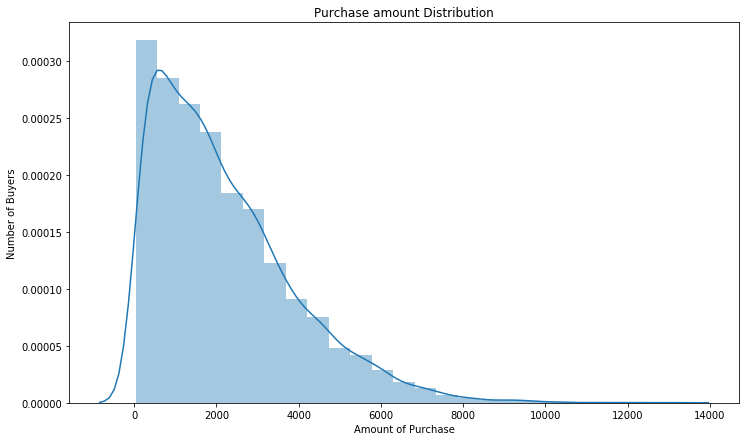

In [16]:
#exploration of dataset
#1. Distribution of target variable

import seaborn as sns

plt.figure(figsize=(12,7))
sns.distplot(trainset.Item_Outlet_Sales, bins = 25)
plt.xlabel('Amount of Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

This distribution is positive skewed ie, more deviated towarda the right side. To fix this, we need to perform the
log transform , square root and cube root of the same data.

C:\Users\Shweta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Purchase amount Distribution')

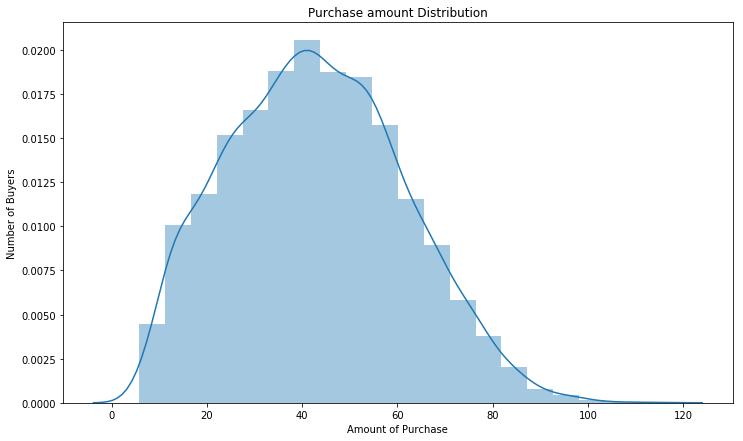

In [17]:
Item_Outlet_Sales = trainset.Item_Outlet_Sales **(1/2)
#p = np.log(train.Item_Outlet_Sales+ 1)
plt.figure(figsize=(12,7))
sns.distplot(Item_Outlet_Sales, bins = 20)
plt.xlabel('Amount of Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

In [18]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
dtype: object

C:\Users\Shweta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


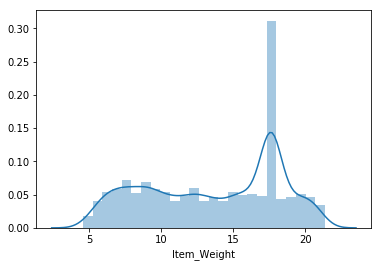

In [19]:
sns.distplot(numeric_features.Item_Weight,bins =25)

In [ ]:
sns.distplot(numeric_features.Item_Visibility,bins =25)

The Item_Visibility is postive skewed and it need to be fixed in the preprocesing step.

C:\Users\Shweta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


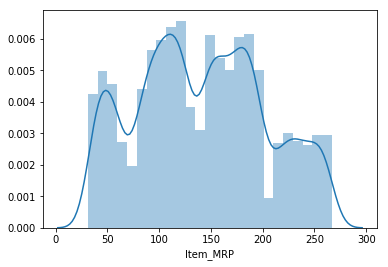

In [21]:
sns.distplot(numeric_features.Item_MRP,bins =25)

 We can infer from the item_MRP that the variable is segemented in four parts, for better interpretation of the variable

C:\Users\Shweta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


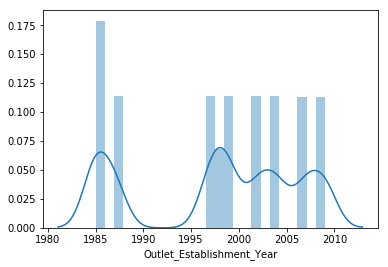

In [22]:
sns.distplot(numeric_features.Outlet_Establishment_Year, bins = 25)

from univariate Analysis
item_weight show no pattern is the graph
item_visibility is right skewed, which need to be curb
In item_mrp we can infer that there the variable is segmented into 4 parts

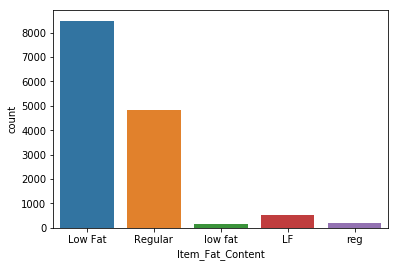

In [23]:
#analysis of categorical variable
sns.countplot(data.Item_Fat_Content)

In [24]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({"low fat":"Low Fat","reg" : "Regular","LF": "Low Fat"}) 


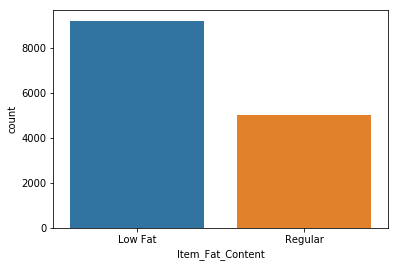

In [25]:
sns.countplot(data.Item_Fat_Content)

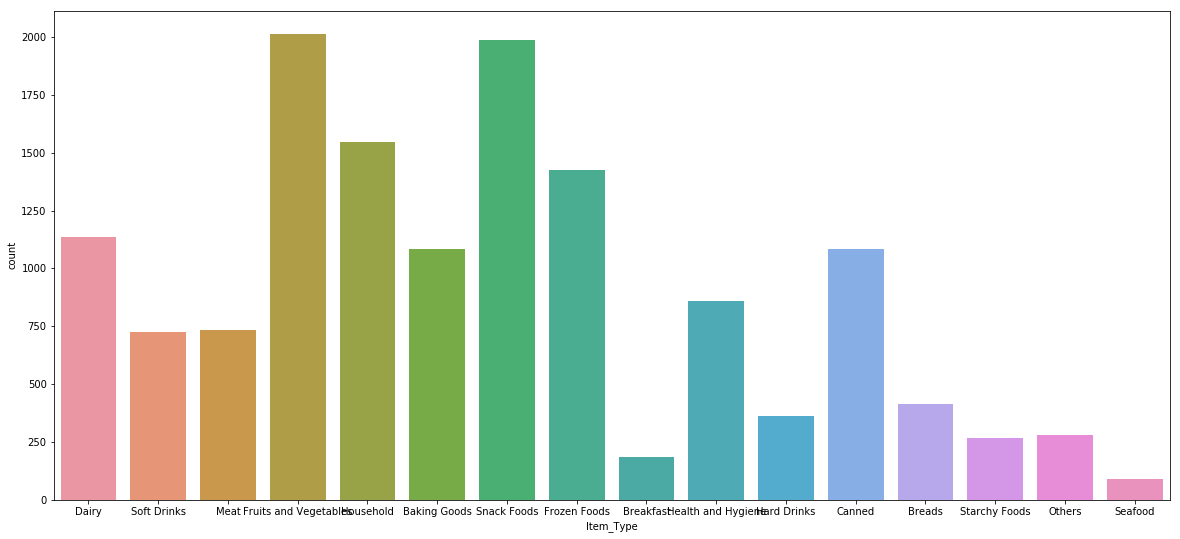

In [26]:
f, ax = plt.subplots(figsize=(20, 9))
sns.countplot(data.Item_Type)

In [27]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'source'],
      dtype='object')

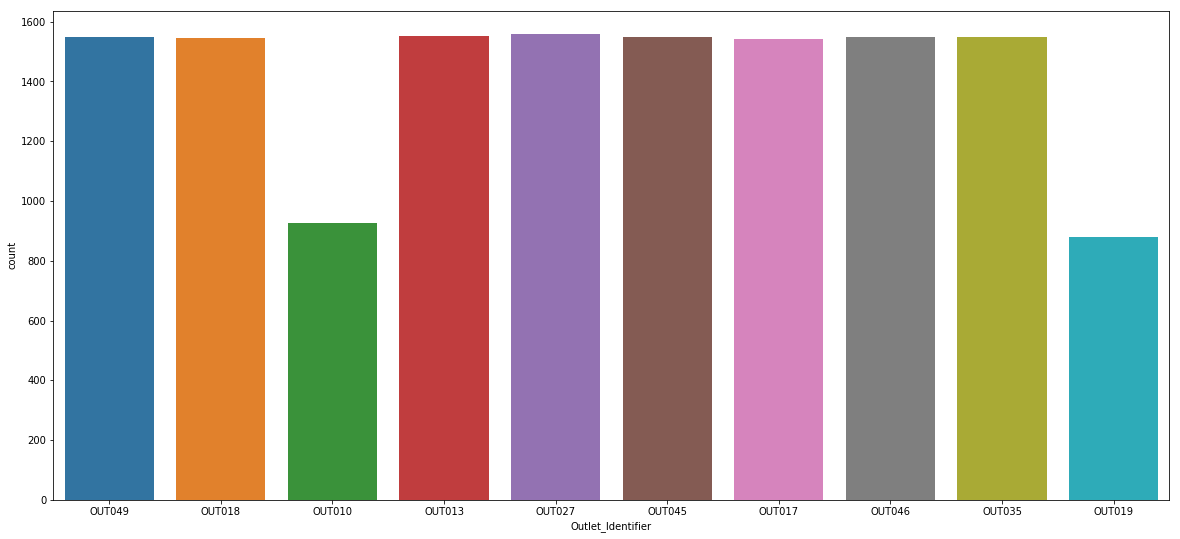

In [28]:
f, ax = plt.subplots(figsize=(20, 9))
sns.countplot(data.Outlet_Identifier)


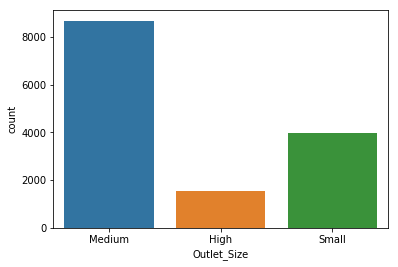

In [29]:
sns.countplot(data.Outlet_Size)


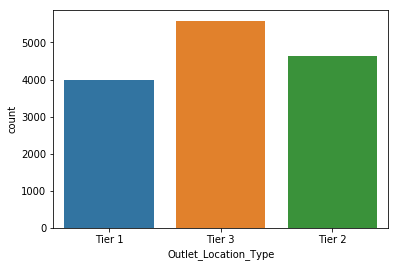

In [30]:
sns.countplot(data.Outlet_Location_Type)


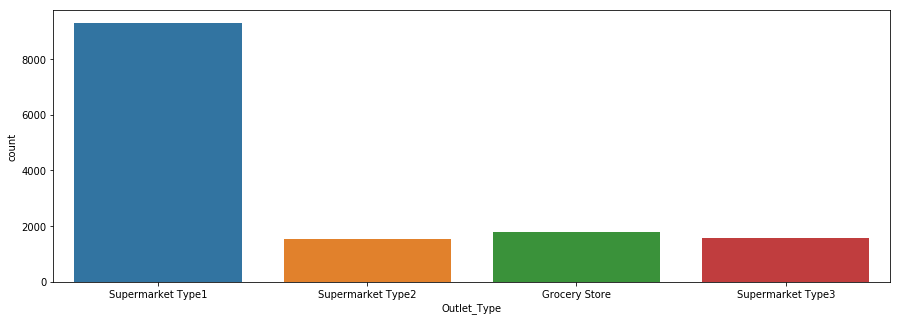

In [31]:
f, ax = plt.subplots(figsize=(15,5))
sns.countplot(data.Outlet_Type,)

from the outlet_type graph we can infer that supermarket type 1 is more famous among people

C:\Users\Shweta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


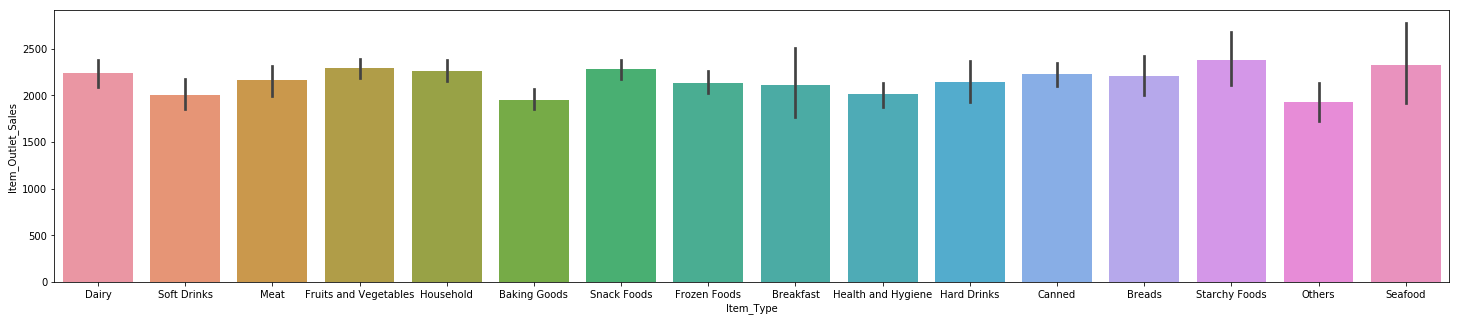

In [32]:
#Bivariate Analysis
#Target Variable v/s independent vaviables
f, ax = plt.subplots(figsize=(25,5))
sns.barplot(x= "Item_Type", y= "Item_Outlet_Sales", data = trainset)

C:\Users\Shweta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


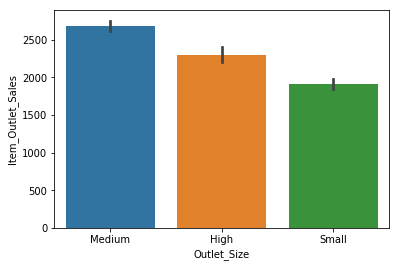

In [33]:
sns.barplot(x= "Outlet_Size", y= "Item_Outlet_Sales", data = trainset)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 1.3+ MB


In [35]:
#feature engineering
data['Item'] = data['Item_Identifier'].apply(lambda x:x[0:2])

#rename them to categories
data['Item']= data['Item'].map({'FD':'Food', 'NC': 'Non-Consumable', 'DR':'Drinks'})
data['Item'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item, dtype: int64

In [36]:
#Mark non-consumables as separate category in fat content:

data.loc[data['Item']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [37]:
#categories the Item_MRP
#k['MRP'] = pd.DataFrame()
for i in range(data.shape[0]):
    #print(i)
    if(data['Item_MRP'].loc[i] < 69):
        data.at[i,'Item_MRP'] = "1"                                 
    elif(data['Item_MRP'].loc[i]  >= 69 + data['Item_MRP'].loc[i] < 136):
        data.at[i, 'Item_MRP'] = "2"                                         
    elif(data['Item_MRP'].loc[i]  >= 136 + data['Item_MRP'].loc[i] < 190):
        data.at[i, 'Item_MRP'] = "3"
    else:
         data.at[i,'Item_MRP'] = "4"

In [38]:
#fix the issue of skewness
data.Item_Visibility = data.Item_Visibility **(1/2)

In [40]:
#encode the categorical value using label encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
#Now we will encode the data into labels using label encoder for easy computing
var= ['Item_Fat_Content', 'Item', 'Outlet_Location_Type',  'Outlet_Type' ,'Outlet_Size' ]
for i in var:
    data[i] = label.fit_transform(data[i])
#Here we applied encoder onto data
#X.head(12)

In [41]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item
0,FDA15,9.30,0,0.016047,Dairy,4.0,OUT049,1999,1,0,1,X,1
1,DRC01,5.92,2,0.019278,Soft Drinks,1.0,OUT018,2009,1,2,2,X,0
2,FDN15,17.50,0,0.016760,Meat,4.0,OUT049,1999,1,0,1,X,1
3,FDX07,19.20,2,0.065953,Fruits and Vegetables,4.0,OUT010,1998,1,2,0,X,1
4,NCD19,8.93,1,0.065953,Household,1.0,OUT013,1987,0,2,1,X,2


In [42]:
#encode the identifiers also
data['Outlet'] = label.fit_transform(data['Outlet_Identifier'])
data['Identifier'] = label.fit_transform(data['Item_Identifier'])

In [43]:
#Datatype conversion
data.Identifier = pd.to_numeric(data.Identifier)
data.Outlet = pd.to_numeric(data.Outlet)
data.Item_Fat_Content = pd.to_numeric(data.Item_Fat_Content )
data.Outlet_Size = pd.to_numeric(data.Outlet_Size)
data.Outlet_Location_Type = pd.to_numeric(data.Outlet_Location_Type)
data.Outlet_Type= pd.to_numeric(data.Outlet_Type)
data.Item = pd.to_numeric(data.Item)

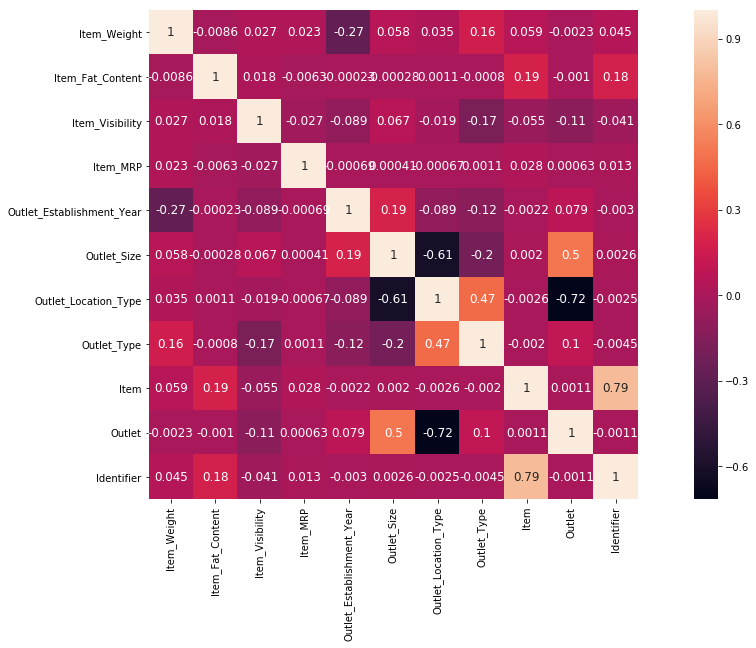

In [44]:
#identify the corealation from the plot
correlations = data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(correlations, square = True,annot_kws={'size': 12}, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [45]:
#drop the not required columns from the data set

data.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


In [46]:
#Divide into test and train:
train = data.loc[data['source']=="X"]
test = data.loc[data['source']=="test"]
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\Shweta\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [47]:
#check the final data and dimension 
print(test.head())
print(train.head())
print(test.shape)
print(train.shape)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
8523       20.750                 0         0.007565       4.0            1   
8524        8.300                 2         0.038428       4.0            1   
8525       14.600                 1         0.099575       4.0            1   
8526        7.315                 0         0.015388       4.0            1   
8527       17.600                 2         0.118599       4.0            1   

      Outlet_Location_Type  Outlet_Type  Item  Outlet  Identifier  
8523                     0            1     1       9        1114  
8524                     1            1     1       2        1078  
8525                     2            0     2       0        1420  
8526                     1            1     1       2         817  
8527                     2            3     1       5        1197  
   Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0         9.30                 0         

In [48]:
#split the data into train and test dataset
from sklearn.model_selection import train_test_split

target = trainset['Item_Outlet_Sales']
train_x,test_x, train_y,test_y=train_test_split(train, target,test_size=0.3)
#random state is excluded so as to see the variation in accuracy among diff models other wise it will give same accuracy.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(test_y.head())

(5966, 10)
(5966,)
(2557, 10)
(2557,)
5776    2516.7240
5834     141.8154
4769    4206.5244
5053    2940.1728
4581    1245.0460
Name: Item_Outlet_Sales, dtype: float64


In [50]:
#Building the model
#Linear Regression

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x,train_y)
predictions = model.predict(test_x)                           
rms = sqrt(mean_squared_error(test_y,predictions))
print('Root mean square error:',rms)

Root mean square error: 1397.6327697937204


In [63]:
#RandomForestRegressor
from sklearn.ensemble import  RandomForestRegressor
Rf = RandomForestRegressor()
Rf.fit(train_x,train_y)# now fit our model for training data
prediction2= Rf.predict(test_x)
rms = sqrt(mean_squared_error(test_y,prediction2))
print('Root mean square error:',rms)
#1345

C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Root mean square error: 1336.7249971930394


In [61]:
#XGBoost Regressor

import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear',learning_rate = 0.1)
print(xg_reg)
xg_reg.fit(train_x,train_y)

preds = xg_reg.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, preds))
print("RMSE: %f" % (rmse))

1407.6585746800072

In [72]:
#we can improve the RMSE of the model ie, decrease 
#Grid SearchCV
from sklearn.model_selection import GridSearchCV

max_depth= list(range(15,21,2))
n_estimators = list(range(150,350,50))


param_grid = dict(max_depth= max_depth,n_estimators=n_estimators )

grid = GridSearchCV(estimator=Rf, param_grid=param_grid, cv = 5, n_jobs=-1)
grid_result = grid.fit(train_x,train_y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.412742 using {'max_depth': 15, 'n_estimators': 300}


In [74]:
#RandomForest with the estimated parameters to imorove the rmse

Rf = RandomForestRegressor(max_depth= 17 , n_estimators = 300)
Rf.fit(train_x,train_y)# now fit our model for training data
prediction2= Rf.predict(test_x)
rms = sqrt(mean_squared_error(test_y,prediction2))
print('Root mean square error:',rms)

Root mean square error: 1293.5824888885584


In [111]:
#predict the ouptut of the test data
prediction= Rf.predict(test)# predict for the test data
print(prediction)

[2365.47394023 2182.58123467  611.56137406 ... 2598.75060306 3201.03023621
 2304.36641018]


In [112]:
#store the prediction in required dataframe

output= pd.DataFrame(testset,columns= ['Item_Identifier','Outlet_Identifier'])
output['Item_outlet_Sales']= prediction
output.to_csv('my_submission1.csv', index=False)

,Item_Identifier,Outlet_Identifier,Item_outlet_Sales
0,FDW58,OUT049,2365.473940
1,FDW14,OUT017,2182.581235
2,NCN55,OUT010,611.561374
3,FDQ58,OUT017,1779.057511
4,FDY38,OUT027,4660.513033
